In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting the graph
import seaborn as sns # visualizing the graph

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nitc-ai-club-inductions/sample_submission.csv
/kaggle/input/nitc-ai-club-inductions/train.csv
/kaggle/input/nitc-ai-club-inductions/test.csv


In [2]:
df1 = pd.read_csv("/kaggle/input/nitc-ai-club-inductions/train.csv") #read the data 
df2 = pd.read_csv("/kaggle/input/nitc-ai-club-inductions/test.csv")

In [3]:
df1.head() # to show starting rows

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,0.8250,0.6500,0.2375,5.669900,2.721552,1.587572,1.984465,6.0
1,1,M,1.4250,1.1125,0.3750,24.139599,12.870673,5.003687,7.087375,9.0
2,2,F,1.3000,0.9875,0.3375,15.436303,6.973977,2.934173,6.236890,11.0
3,3,F,1.1000,0.8625,0.3125,12.785625,4.861939,2.593979,3.685435,14.0
4,4,F,1.6125,1.2750,0.4000,33.877653,15.989118,7.271647,9.681354,9.0


In [4]:
df2.head() #to show starting 

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,15000,M,1.3250,1.0125,0.3875,20.950281,7.555142,4.535920,7.172423
1,15001,I,1.2125,0.9125,0.2625,14.755915,6.123492,3.486988,4.819415
2,15002,F,1.3625,1.0125,0.3125,18.809893,8.419802,4.195726,5.953395
3,15003,M,1.2500,0.9750,0.3000,15.776497,6.279414,3.756309,4.535920
4,15004,M,1.5625,1.2500,0.4375,36.514156,13.990478,8.930093,9.879801


## Null values Handling

In [5]:
df1.isnull().sum() # sum all the null values present in given columns

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [6]:
df2.isnull().sum() # sum all the null values present in given columns

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
dtype: int64

In [7]:
df1.info() # get imformation about data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              15000 non-null  int64  
 1   Sex             15000 non-null  object 
 2   Length          15000 non-null  float64
 3   Diameter        15000 non-null  float64
 4   Height          15000 non-null  float64
 5   Weight          15000 non-null  float64
 6   Shucked Weight  15000 non-null  float64
 7   Viscera Weight  15000 non-null  float64
 8   Shell Weight    15000 non-null  float64
 9   Age             15000 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.1+ MB


As we can see that Sex column contain object type data we will carefully see what kind of data it contains

In [8]:
df1["Sex"].unique()

array(['I', 'M', 'F'], dtype=object)

We can see that there are three alphabets 
* "I" : Transgender
* "M" : Male
* "F" : Female

We are going to change this object type data in some number so that it works on well on the Machine Learning algorithm

In [9]:
df1["Sex"].replace({"M":0,"F":1,"I":2},inplace=True) # replace the object data to int
df2["Sex"].replace({"F":1,"M":0,"I":2},inplace=True)

/tmp/ipykernel_17/1800032522.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["Sex"].replace({"M":0,"F":1,"I":2},inplace=True) # replace the object data to int
/tmp/ipykernel_17/1800032522.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1["Sex"].replace({"M":0,"F":1,"I":2},inplace=True)

In [10]:
df1.head() # to show starting row

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,2,0.8250,0.6500,0.2375,5.669900,2.721552,1.587572,1.984465,6.0
1,1,0,1.4250,1.1125,0.3750,24.139599,12.870673,5.003687,7.087375,9.0
2,2,1,1.3000,0.9875,0.3375,15.436303,6.973977,2.934173,6.236890,11.0
3,3,1,1.1000,0.8625,0.3125,12.785625,4.861939,2.593979,3.685435,14.0
4,4,1,1.6125,1.2750,0.4000,33.877653,15.989118,7.271647,9.681354,9.0


In [11]:
df2.head() # to show starting row

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,15000,0,1.3250,1.0125,0.3875,20.950281,7.555142,4.535920,7.172423
1,15001,2,1.2125,0.9125,0.2625,14.755915,6.123492,3.486988,4.819415
2,15002,1,1.3625,1.0125,0.3125,18.809893,8.419802,4.195726,5.953395
3,15003,0,1.2500,0.9750,0.3000,15.776497,6.279414,3.756309,4.535920
4,15004,0,1.5625,1.2500,0.4375,36.514156,13.990478,8.930093,9.879801


## Outlair handling

In [12]:
df1.describe() # get description 

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,0.967533,1.314798,1.022386,0.347224,23.232283,10.053759,5.016302,6.650139,9.956000
std,4330.271354,0.836815,0.289765,0.238516,0.091086,12.554492,5.597627,2.778949,3.519897,3.206319
min,0.000000,0.000000,0.325000,0.187500,0.000000,0.226796,0.014175,0.014175,0.042524,1.000000
25%,3749.750000,0.000000,1.150000,0.887500,0.287500,13.239216,5.712424,2.806601,3.827183,8.000000
50%,7499.500000,1.000000,1.387500,1.075000,0.362500,23.714357,9.879801,4.918638,6.839317,10.000000
75%,11249.250000,2.000000,1.537500,1.200000,0.412500,32.134158,13.990478,6.959802,9.071840,11.000000
max,14999.000000,2.000000,2.000000,1.637500,0.700000,72.291225,38.243476,16.300963,23.104843,29.000000


As we can see that that there is not much difference between the mean and max so we can conclude that there are few Outlairs in the given Data in order to vislualize it lets plot boxplot

In [13]:
x = df1.drop(columns=["id",]) # droppping id column and storing in the new variable


In [14]:
x_df2 = df2.drop(columns=["id"]) # dropping id from column and storing in the new variable

In [15]:
Id = pd.DataFrame(df2["id"],columns=["id"]) # converting to DataFrame

In [16]:
Id.head()

,id
0,15000
1,15001
2,15002
3,15003
4,15004


In [17]:
Id.head()

,id
0,15000
1,15001
2,15002
3,15003
4,15004


Since "id" will not going to provide any information hence we are dropping it

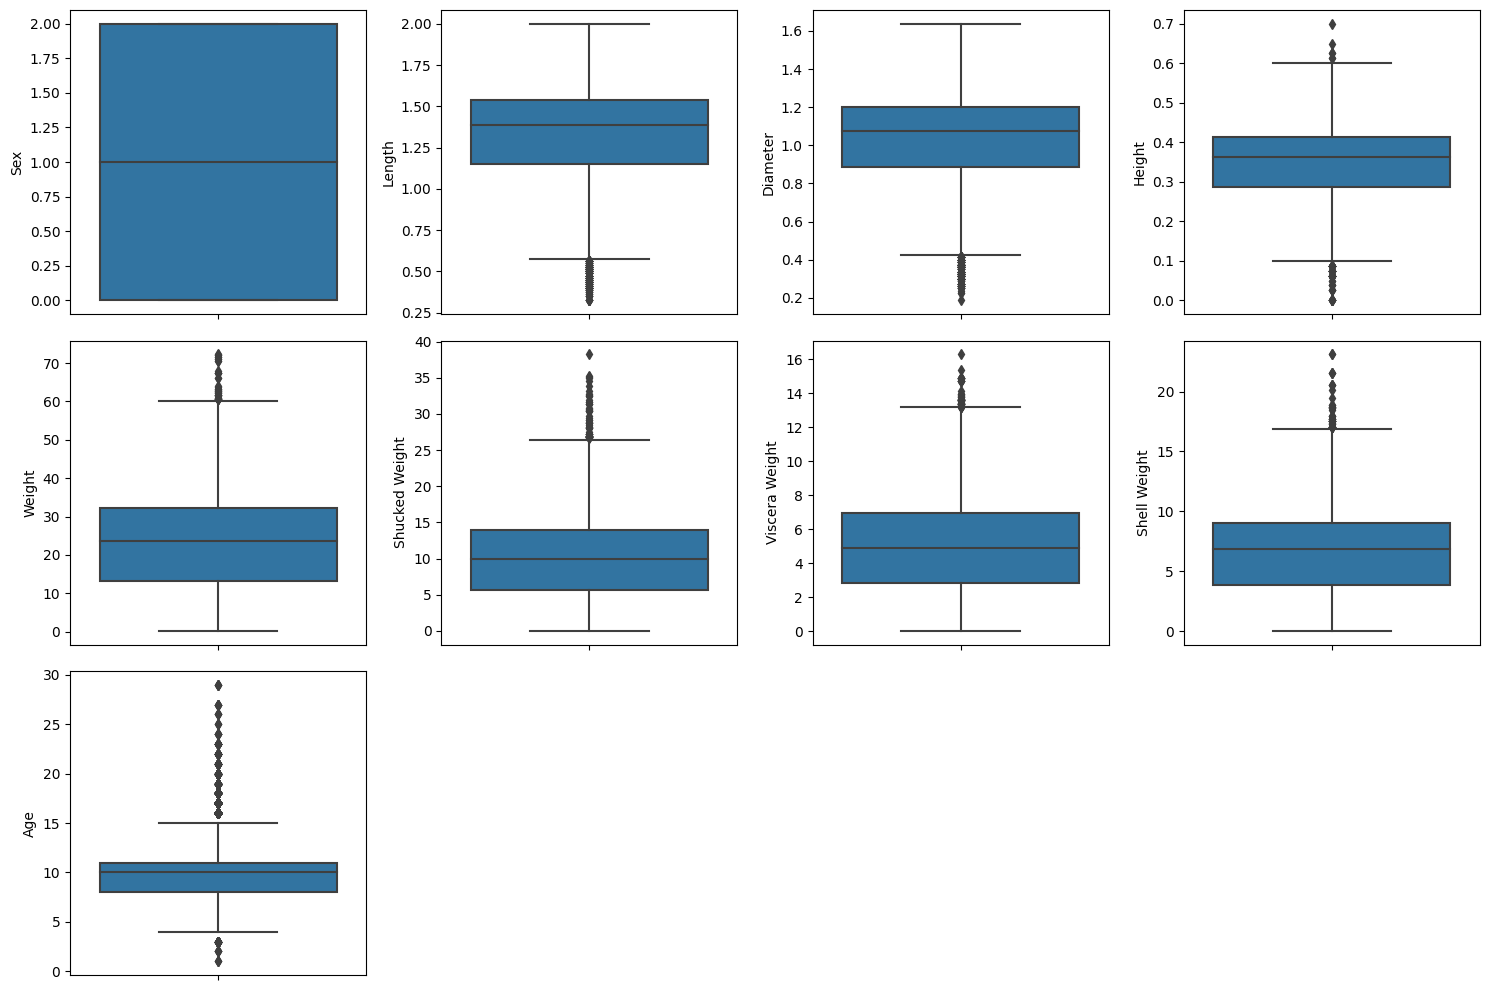

In [18]:
plt.figure(figsize=(15,10))
for i,col in enumerate(x.columns):
    plt.subplot(3,4,i+1)
    sns.boxplot(y=col,data=x)
    plt.tight_layout()
plt.show()

We can visualize that there are few outlairs in the dataset so we will try to remove those outlairs

In [19]:
for i in x.columns:
    q1 = x[i].quantile(0.25)
    q3 = x[i].quantile(0.75)
    IQR = q3 - q1
    min_range = q1 - (1.5 * IQR)
    max_range = q3 + (1.5 * IQR)
    df1 = df1[(df1[i] >= min_range) & (df1[i] <= max_range)]


In [20]:
print(f"shape of df1 after removing outlairs: {df1.shape}")

shape of df1 after removing outlairs: (13614, 10)


Frist we have seen that we had 15000 rows before removing outlairs but after removing outalair we had 13614 rows which is acceptable when we had large data set

## Nature Of Data

Lets first plot the pair plot to see the distribution of the graph

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

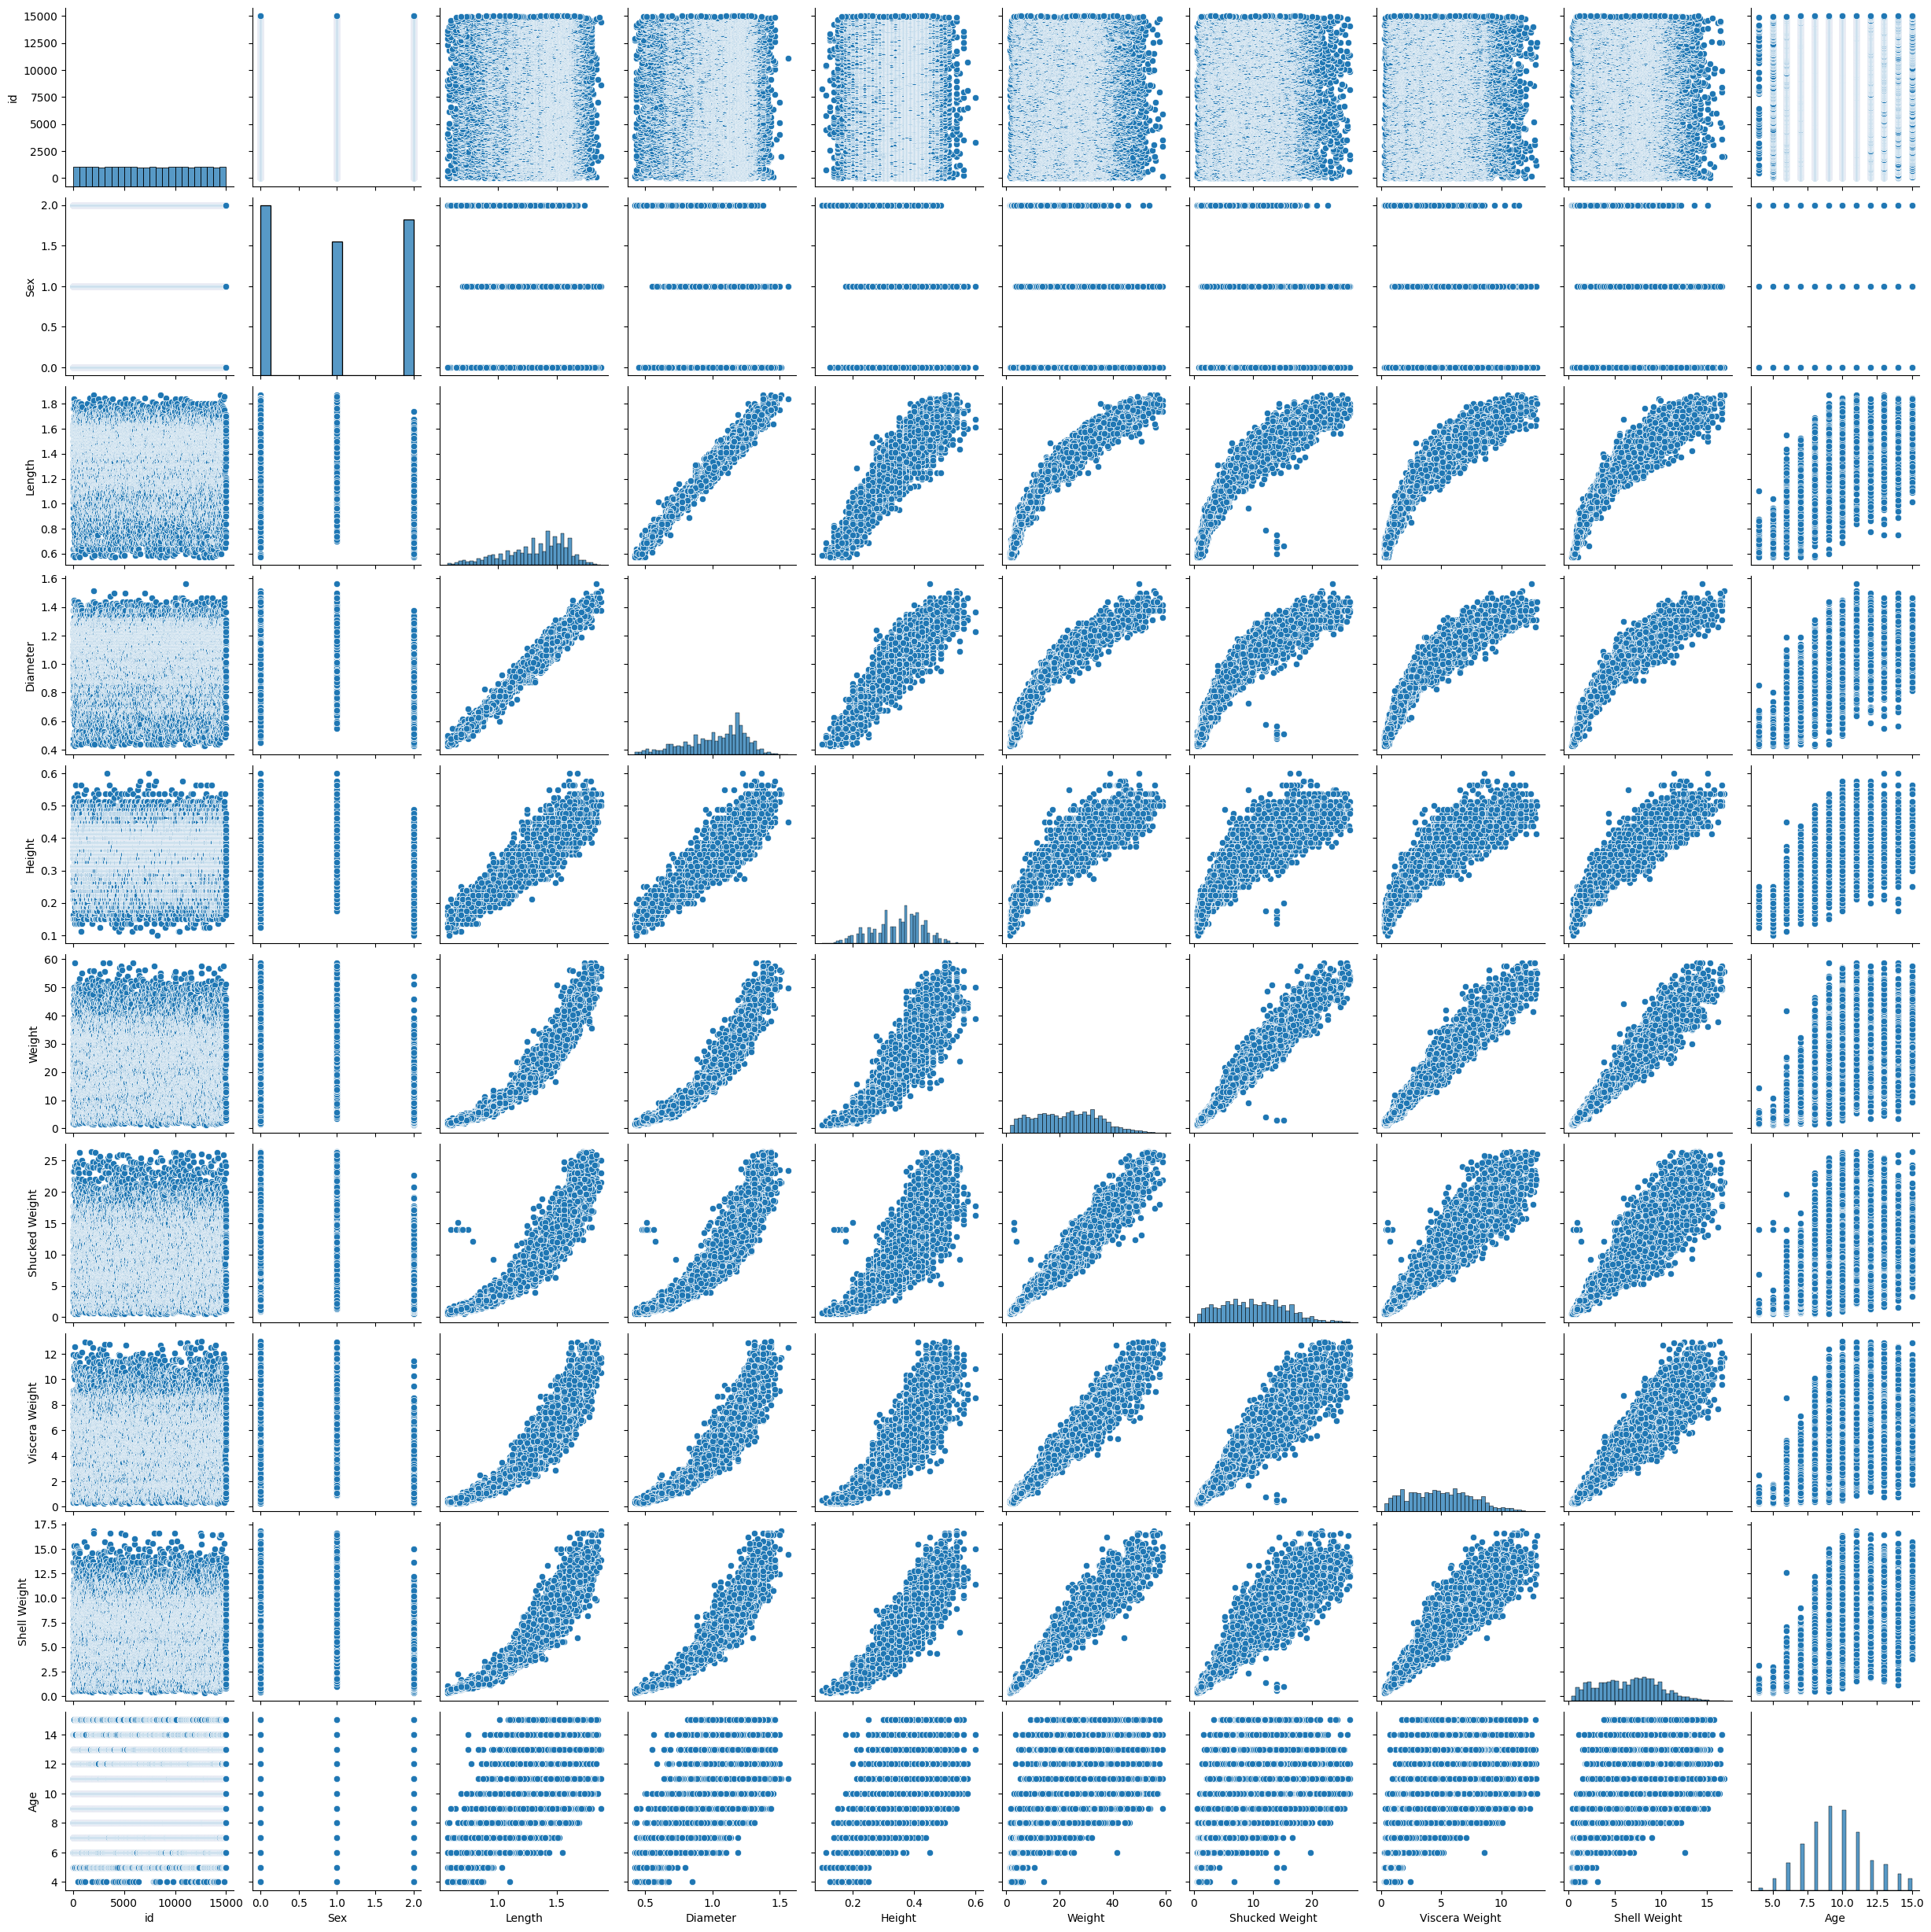

In [21]:
sns.pairplot(data=df1)
plt.show()

Graph is almost linear in nature in order to visualize it more clearly lets plot heatmap

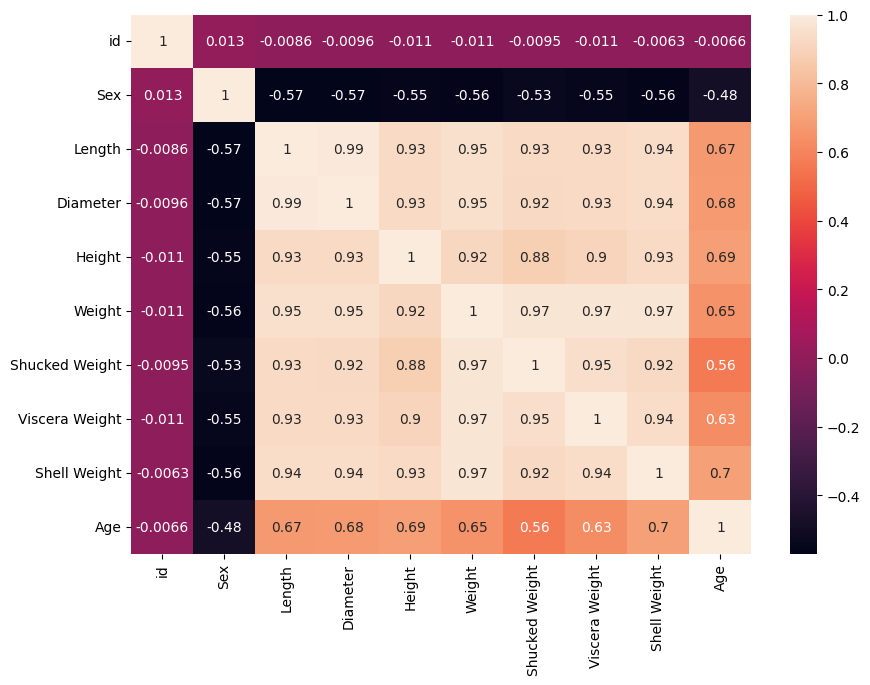

In [22]:
plt.figure(figsize=(10,7))
sns.heatmap(data=df1.corr(),annot=True)
plt.show()

By observing the above graph we concluded that we have given a regression problem so will use algorithms accordingly

In [23]:
X = x.drop(["Age"],axis=1) # drop Age column
y= x["Age"]

In [24]:
X.head() # to show first few row

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,2,0.8250,0.6500,0.2375,5.669900,2.721552,1.587572,1.984465
1,0,1.4250,1.1125,0.3750,24.139599,12.870673,5.003687,7.087375
2,1,1.3000,0.9875,0.3375,15.436303,6.973977,2.934173,6.236890
3,1,1.1000,0.8625,0.3125,12.785625,4.861939,2.593979,3.685435
4,1,1.6125,1.2750,0.4000,33.877653,15.989118,7.271647,9.681354


lets train test and split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

## Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
ss = StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [30]:
x_df2 = ss.transform(x_df2)

## Algorithm Execution

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

In [32]:
gbr = GradientBoostingRegressor(random_state=42,learning_rate=0.05,max_depth=5)

In [33]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, random_state=42)

In [34]:
gbr.score(x_test,y_test),gbr.score(x_train,y_train)

(0.6099103071944474, 0.6861373623667206)

In [35]:
mean_squared_error(y_test,gbr.predict(x_test))

3.8813871988760447

In [36]:
mean_absolute_error(y_test,gbr.predict(x_test))

1.3468714853605037

## Prediction

In [37]:
x.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

In [38]:
x_df2 = pd.DataFrame(x_df2,columns=X.columns)

In [39]:
result = pd.concat([Id,x_df2], axis=1)

In [40]:
result.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,15000,-1.158955,0.035053,-0.041784,0.441004,-0.182042,-0.444683,-0.172492,0.148602
1,15001,1.230027,-0.352954,-0.460770,-0.931201,-0.674755,-0.699993,-0.549712,-0.519997
2,15002,0.035536,0.164388,-0.041784,-0.382319,-0.352293,-0.290485,-0.294834,-0.197780
3,15003,-1.158955,-0.223618,-0.198904,-0.519540,-0.593576,-0.672187,-0.452858,-0.600551
4,15004,-1.158955,0.854178,0.953306,0.989886,1.055943,0.702950,1.407753,0.917893


In [41]:
prediction=np.round(gbr.predict(result.drop(["id"],axis=1,inplace=False))).astype(int)
submission=pd.DataFrame({"id":result["id"],"Age":prediction})
submission.to_csv("submission.csv",index=False)
submission.sample(20)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


,id,Age
2583,17583,9
2375,17375,14
8583,23583,12
5117,20117,8
3629,18629,5
3248,18248,9
379,15379,8
5710,20710,11
4312,19312,10
2007,17007,11


## Conclusion 

First I did exploratory data analysis where I clean the data after that I did feature scaling and at last I performed a lot of Regression algorithm where from all algorithm gradient boosting only giving the lowest MAE